In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random as rnd

df = pd.read_csv("data.csv", sep=';', encoding = "ISO-8859-1")

In [3]:
#Task1
def DrawPoints(coord1, coord2, First, Last):
    plt.figure()
    plt.grid(True)
    X=df[coord1]
    Y=df[coord2]
    i=First
    while i <= Last:
        plt.scatter(df[coord1][i], df[coord2][i], color="blue")
        i+=1
    plt.show()

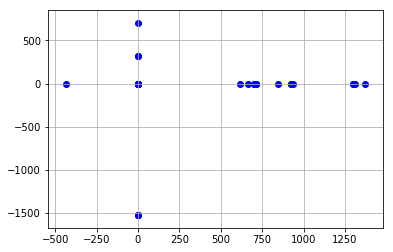

done


In [4]:
#DrawPoint('X13', 'X14')
DrawPoints('X13', 'X14', 1, 100)#just testing
print ("done")

In [5]:
#Task2
def PrintParams(ProbArray, TrueArray, NeedPrint):
    i=0
    tn = 0
    tp = 0
    fn = 0
    fp = 0
    un = 0
    while i < min(len(ProbArray), len(TrueArray)):
        if ProbArray[i] >= 0.5:
            if TrueArray[i] == "F":
                tp+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], "\t", TrueArray[i], "  tp")#true positive
            if TrueArray[i] == "G":
                fp+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], "\t", TrueArray[i], "  fp")#false positive
        else:
            if TrueArray[i] == "F":
                fn+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], "\t", TrueArray[i], "  fn")#false negative
            if TrueArray[i] == "G":
                tn+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], "\t", TrueArray[i], "tn")#true negative
        if TrueArray[i] == "U":
            un+=1
            if NeedPrint != 0: 
                print (ProbArray[i], "\t", TrueArray[i], "  un")#unable to classify
        i+=1
    print("Summary:")
    print ("true positive:", tp)
    print ("true negative:", tn)
    print ("false positive:", fp)
    print ("false negative:", fn)
    print ("unable to classify:", un)
    

In [6]:
print("From p1_Fraud:")
PrintParams(df['p1_Fraud'][:100], df['CLASS'][:100], 1)
print("\nFrom p5_Fraud:")
PrintParams(df['p5_Fraud'], df['CLASS'], 0)

From p1_Fraud:
0.2608 	 G tn
0.1233 	 G tn
0.0433 	 G tn
0.28 	 G tn
0.3117 	 G tn
0.1758 	 G tn
0.345 	 F   fn
0.1242 	 G tn
0.0642 	 G tn
0.0758 	 G tn
0.0733 	 G tn
0.275 	 G tn
0.0542 	 G tn
0.0717 	 G tn
0.085 	 G tn
0.306 	 F   fn
0.163 	 F   fn
0.391 	 F   fn
0.01 	 G tn
0.0333 	 G tn
0.473 	 G tn
0.3675 	 F   fn
0.575 	 G   fp
0.641 	 G   fp
0.641 	 G   fp
0.065 	 G tn
0.0642 	 G tn
0.185 	 F   fn
0.614 	 G   fp
0.0242 	 G tn
0.075 	 G tn
0.36 	 G tn
0.3442 	 G tn
0.32 	 G tn
0.277 	 F   fn
0.135 	 G tn
0.0308 	 G tn
0.0317 	 G tn
0.0992 	 F   fn
0.456 	 F   fn
0.1683 	 G tn
0.0092 	 G tn
0.0542 	 G tn
0.659 	 F   tp
0.2917 	 G tn
0.0683 	 G tn
0.686 	 F   tp
0.1617 	 G tn
0.2825 	 G tn
0.695 	 F   tp
0.38 	 G tn
0.0492 	 G tn
0.395 	 G tn
0.649 	 G   fp
0.474 	 F   fn
0.21 	 G tn
0.691 	 F   tp
0.29 	 G tn
0.065 	 G tn
0.0717 	 G tn
0.695 	 F   tp
0.2967 	 G tn
0.22 	 F   fn
0.678 	 G   fp
0.603 	 G   fp
0.667 	 G   fp
0.0942 	 G tn
0.1008 	 G tn
0.344 	 U   un
0.065 	 G tn
0.

In [7]:
def CalcFP(ProbArray, TrueArray, Border):#false positive probability (fraud: P>=Border)
    All=min(len(ProbArray), len(TrueArray))
    FPC=0
    i=1
    while i < min(len(ProbArray), len(TrueArray)):
        if ProbArray[i] >= Border and TrueArray[i] == "G":
            FPC+=1
        i+=1
    return FPC/All

def CalcFN(ProbArray, TrueArray, Border):#false negative probability (fraud: P>=Border)
    All=min(len(ProbArray), len(TrueArray))
    FNC=0
    i=1
    while i < min(len(ProbArray), len(TrueArray)):
        if ProbArray[i] < Border and TrueArray[i] == "F":
            FNC+=1
        i+=1
    return FNC/All

def CalcTP(ProbArray, TrueArray, Border):#true positive probability (fraud: P>=Border)
    All=min(len(ProbArray), len(TrueArray))
    TPC=0
    i=1
    while i < min(len(ProbArray), len(TrueArray)):
        if ProbArray[i] >= Border and TrueArray[i] == "F":
            TPC+=1
        i+=1
    return TPC/All

def CalcTN(ProbArray, TrueArray, Border):#true negative probability (fraud: P>=Border)
    All=min(len(ProbArray), len(TrueArray))
    TNC=0
    i=1
    while i < min(len(ProbArray), len(TrueArray)):
        if ProbArray[i] < Border and TrueArray[i] == "G":
            TNC+=1
        i+=1
    return TNC/All

def CalcBorder (ProbArray, TrueArray, MaxFP):#calculate Border (false positive <= MaxFP)
    Border=0
    Incr=0.1
    while CalcFP(ProbArray, TrueArray, Border) > MaxFP:
        if Border+Incr == 1:
            Incr/=10
        Border+=Incr
    return Border

def CalcRecall (ProbArray, TrueArray, Border):#calculate recall
    TP = CalcTP(ProbArray, TrueArray, Border)
    FN = CalcFN(ProbArray, TrueArray, Border)
    Recall = TP/(TP+FN)
    return Recall

def CalcPrecision (ProbArray, TrueArray, Border):#calculate precision
    TP = CalcTP(ProbArray, TrueArray, Border)
    FP = CalcFP(ProbArray, TrueArray, Border)
    Precision = TP/(TP+FP)
    return Precision    

In [8]:
print(CalcFP(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))

0.14


In [9]:
print(CalcFP(df['p1_Fraud'][:100], df['CLASS'][:100], 0))
print(CalcBorder(df['p1_Fraud'][:100], df['CLASS'][:100], 0.2))#false positive <= 0.2

0.77
0.4


In [10]:
print("False positive: ", CalcFP(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))
print("False negative: ", CalcFN(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))
print("True positive: ", CalcTP(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))
print("Recall: ", CalcRecall(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))
print("Precision: ", CalcPrecision(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))

False positive:  0.14
False negative:  0.13
True positive:  0.06
Recall:  0.3157894736842105
Precision:  0.3


In [17]:
#Task3
def CalcTPR (ProbArray, TrueArray, Border):
    TP=CalcTP(ProbArray, TrueArray, Border)
    FN=CalcFN(ProbArray, TrueArray, Border)
    if TP+FN!=0:
        TPR=TP/(TP+FN)
        return TPR
    else:
        return 0

def CalcFPR (ProbArray, TrueArray, Border):
    FP=CalcFP(ProbArray, TrueArray, Border)
    TN=CalcTN(ProbArray, TrueArray, Border)
    if FP+TN!=0:
        FPR=FP/(FP+TN)
        return FPR
    else:
        return 0

def ROC_And_Gini (ProbArray, TrueArray, Step, Print):#Draw ROC (Print=1) and calc Gini
    plt.grid(True)
    Gini=0
    X=[]
    Y=[]
    Counter=0
    Border=0
    while Border <= 1:
        X.insert(Counter, CalcFPR(ProbArray, TrueArray, Border))
        Y.insert(Counter, CalcTPR(ProbArray, TrueArray, Border))
        Gini=max(Gini, abs(X[Counter] - Y[Counter]))
        Counter+=1
        if Border < 1 and Border + Step > 1:
            Border = 1
        else:
            Border+=Step
    if Print == 1:
        plt.plot([0, 1], [0, 1], 'g:')
        plt.plot(X,Y,'b-')
        plt.show()
    return Gini

p1_Fraud:


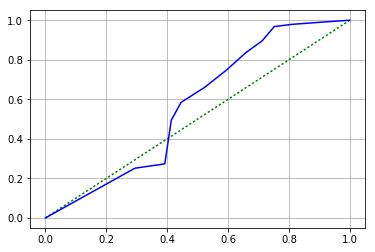

Gini1 =  0.21599193362080893

p2_Fraud:


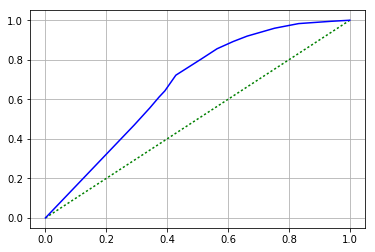

Gini2 =  0.2935194110815881

p3_Fraud:


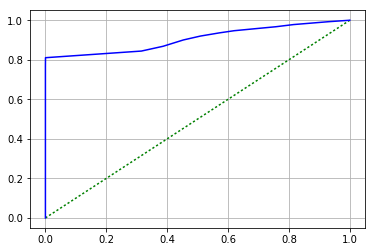

Gini3 =  0.8102299301457876

p4_Fraud:


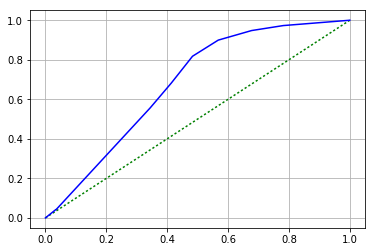

Gini4 =  0.33455958891742527

p5_Fraud:


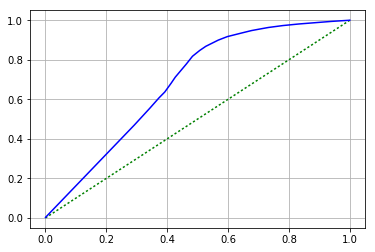

Gini5 =  0.34117571691164283


In [18]:
print ("p1_Fraud:")
print ("Gini1 = ", ROC_And_Gini(df['p1_Fraud'], df['CLASS'], 0.05, 1))
print ("\np2_Fraud:")
print ("Gini2 = ", ROC_And_Gini(df['p2_Fraud'], df['CLASS'], 0.05, 1))
print ("\np3_Fraud:")
print ("Gini3 = ", ROC_And_Gini(df['p3_Fraud'], df['CLASS'], 0.05, 1))
print ("\np4_Fraud:")
print ("Gini4 = ", ROC_And_Gini(df['p4_Fraud'], df['CLASS'], 0.05, 1))
print ("\np5_Fraud:")
print ("Gini5 = ", ROC_And_Gini(df['p5_Fraud'], df['CLASS'], 0.05, 1))

In [81]:
#Task4
def Vote (Prob, Border):
    if Prob >= Border:
        return 1
    else:
        return -1

def Votation (P1, P2, P3, P4, P5, Real, Border):
    Ansver=0
    FP_Count=0
    i=0
    while i < min(len(P1), len(Real)):
        Ansver+=Vote(P1[i], Border)
        Ansver+=Vote(P2[i], Border)
        Ansver+=Vote(P3[i], Border)
        Ansver+=Vote(P4[i], Border)
        Ansver+=Vote(P5[i], Border)
        if Ansver > 0 and Real[i] == "G":
            FP_Count+=1
        Ansver=0
        i+=1
    return FP_Count

def CalcMinFP_Border (P1, P2, P3, P4, P5, Real, Step):
    Border=1
    Result=Border
    MinFP=Votation (P1, P2, P3, P4, P5, Real, Border)
    FP=0
    while Border >= 0:
        FP=Votation (P1, P2, P3, P4, P5, Real, Border)
        if MinFP < FP:
            Border=-1
        else:
            Result=Border
            MinFP=FP
            Border-=Step
    return Result

def GroupProb1 (Arr1, Arr2, Arr3):
    Group=[]
    i=0
    Length=min(len(Arr1), len(Arr2), len(Arr3)
    while i < Length:
        Group.insert(i, (Arr1[i]+Arr2[i]+Arr3[i])/3)
        i+=1
    return Group

False positive (>= 0.5):  7504
False positive (>= 0.8):  0
Min Border (Min FP):  0.7999999999999998


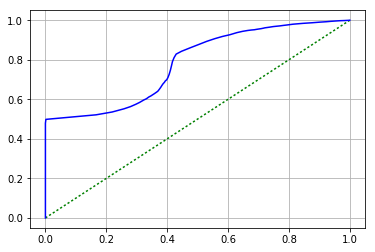

0.49692753663226835

In [83]:
print ("False positive (>= 0.5): ", Votation (df['p1_Fraud'], df['p2_Fraud'], df['p3_Fraud'], df['p4_Fraud'], df['p5_Fraud'], df['CLASS'], 0.5))
print ("False positive (>= 0.8): ", Votation (df['p1_Fraud'], df['p2_Fraud'], df['p3_Fraud'], df['p4_Fraud'], df['p5_Fraud'], df['CLASS'], 0.8))
print ("Min Border (Min FP): ", CalcMinFP_Border (df['p1_Fraud'], df['p2_Fraud'], df['p3_Fraud'], df['p4_Fraud'], df['p5_Fraud'], df['CLASS'], 0.01))

Group=GroupProb1 (df['p1_Fraud'], df['p2_Fraud'], df['p3_Fraud'])
ROC_And_Gini(Group, df['CLASS'], 0.01, 1)

In [90]:
#Task5
def AlreadyUsed (A, B, C, Min, Step):
    i=Min+Step
    Max=min(A,B,C)
    while i < Max:
        if A%i==0 and B%i==0 and C%i==0:
            return 1
        i+=Step
    return 0
    
def GroupProb1 (Arr1, Arr2, Arr3, A, B, C):
    Group=[]
    i=0
    Length=min(len(Arr1), len(Arr2), len(Arr3))
    while i < Length:
        Group.insert(i, (A*Arr1[i]+B*Arr2[i]+C*Arr3[i])/(A+B+C))
        i+=1
    return Group

def CalcMaxGini (P1, P2, P3, Min, Max, Step):
    Gini=0
    Temp=0
    A = Min
    B = Min
    C = Min
    i = Min
    j = Min
    k = Min
    while i<Max:
        while j<Max:
            while k<Max:
                if AlreadyUsed (i, j, k, Min, Step) == 0:
                    Temp=ROC_And_Gini(GroupProb1(P1, P2, P3, i, j, k), df['CLASS'], 0.01, 0)
                    if Temp>Gini:
                        A=i
                        B=j
                        C=k
                        Gini=Temp
                k+=Step
            j+=Step
        i+=Step
    print ("Max Gini=", Gini)
    print ("A=", A)
    print ("B=", B)
    print ("C=", C)

In [91]:
CalcMaxGini (df['p1_Fraud'], df['p2_Fraud'], df['p3_Fraud'], 0.1, 10, 0.1)

KeyboardInterrupt: 

In [25]:
#Task6

In [26]:
#Task7
def CallCenter (ProbArray, TrueArray, Border):
    Delta=0
    RND=0
    i=0
    while i < min(len(ProbArray), len(TrueArray)):
        if ProbArray[i] >= Border:
            RND=rnd.random()
            #print (RND)
            if RND <= 0.9:
                Delta+=400
                if TrueArray[i] == "G":
                    Delta-=2000
        i+=1

    if Delta < 0:
        print ("Bank lost", -1*Delta, "credits")
    else:
        print ("Bank recieved", Delta, "credits")

In [27]:
CallCenter (df['p1_Fraud'], df['CLASS'], 0.75)
CallCenter (df['p1_Fraud'], df['CLASS'], 0.7)
CallCenter (df['p1_Fraud'], df['CLASS'], 0.65)
CallCenter (df['p2_Fraud'], df['CLASS'], 0.7)
CallCenter (df['p3_Fraud'], df['CLASS'], 0.7)
CallCenter (df['p4_Fraud'], df['CLASS'], 0.7)
CallCenter (df['p5_Fraud'], df['CLASS'], 0.7)

Bank recieved 0 credits
Bank lost 2800 credits
Bank lost 7222400 credits
Bank lost 7378000 credits
Bank recieved 2483600 credits
Bank lost 694400 credits
Bank lost 9131200 credits


In [92]:
#Task8